# 판다스 완전 정복

판다스의 자료형 : Series(시리즈)와 DataFrame(데이터프레임)
시리즈는 열 1개
데이터프레임은 시리즈들이 각 요소가 되는 딕셔너리
type 메서드를 이용해서 자료형 확인 -> type(~)
shape라는 속성값을 이용해서 행과 열의 크기를 확인 -> df.shape
columns 속성을 이용하면 데이터 프레임의 열의 이름을 확인할 수 있음  -> df.colums
데이터프레임을 구성하는 값의 자료형은 데이터프레임의 dtypes 속성 or info 메서드로 확인
-> df.dtypes or  df.info()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

## 판다스 기초

In [33]:
df = pd.DataFrame({'판다스_자료형' : ['object', 'int64', 'float64', 'datetime64'], '파이썬_자료형': ['string', 'int', 'float', 'datetime']}, index = ['a','b', 'c','d'])
df

,판다스_자료형,파이썬_자료형
a,object,string
b,int64,int
c,float64,float
d,datetime64,datetime


데이터 프레임에서 열 1개만 추출을 하면 => 시리즈
                  열 2개 이상인 경우 => 데이터프레임

In [28]:
type(df['판다스_자료형'])

pandas.core.series.Series

In [8]:
type(df[['판다스_자료형', '파이썬_자료형']])

pandas.core.frame.DataFrame

행 단위 데이터 추출하기
loc => 인덱스를 기준으로 # 정수 또는 문자열 등등
iloc => 행번호(파이썬에서의 인덱스)를 기준으로 # 정수만 가능

In [17]:
type(df.loc[1]), type(df.iloc[1])

(pandas.core.series.Series, pandas.core.series.Series)

loc나 iloc에 하나의 인자가 들어가면 Series을 반환하고
                두개이상이면 DataFrame을 반환한다

In [14]:
type(df.head(1))

pandas.core.frame.DataFrame

head나 tail은 인자값에 상관없이 DataFrame을 반환한다

행과 열을 동시에 지정할 수 있는데
=> df.loc[[행], [열]] , df.iloc[[행], [열]] 이용

=> 슬라이싱 구문
df.iloc[:, :3]


=> range 메서드
잘 안씀

In [ ]:
https://blog.naver.com/wideeyed/221603778414

## 기초적인 통계 계산기법

In [ ]:
그룹화하여 계산이 필요한 경우
groupby 메서드 => df.groupby('그룹화할 열(여러개가능/ 할때는 리스트로 인자 전달)')['계산할 열(동일)'].함수
그룹화한 데이터의 자료형은 DataFrameGroupBy
그룹화된 데이터에서 열 1개를 추출한 데이터의 자료형은 SeriesGroupBy
                    열 2개를 추출한 경우 DataFrame
그룹화한 데이터 개수 세기
nunique => 데이터의 빈도수

## 간단한 그래프 그리기

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
시리즈.plot() => df.groupby('year')['lifeExp'].mean().plot()

In [76]:
dataset1.groupby('x')['y'].mean()

x
4.0      4.26
5.0      5.68
6.0      7.24
7.0      4.82
8.0      6.95
9.0      8.81
10.0     8.04
11.0     8.33
12.0    10.84
13.0     7.58
14.0     9.96
Name: y, dtype: float64

<AxesSubplot:xlabel='x'>

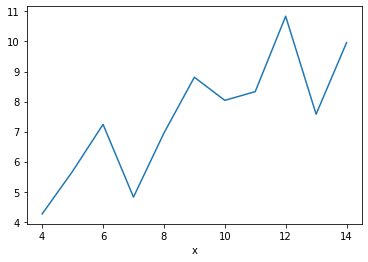

In [75]:
dataset1.groupby('x')['y'].mean().plot()

## 데이터 만들기

In [ ]:
시리즈 만들기
pd.Series(['babo', 'JJA'], index = [인덱스의 이름들])

데이터프레임 만들기
딕셔너리를 DataFrame에 전달
pd.DataFrame(딕션너리 , index = [인덱스의 이름들], coloums  = [열의 이름들 / 순서 지정가능하게 해줌])

또는 OrderedDict 클래스를 이용해서 딕션너리에 있는 순서 그대로 데이터 프레임을 만들어줌
pd.DataFrame(OrderedDict{딕션너리})

## 시리즈 다루기

In [ ]:
시리즈 선택
데이터 프레임에서 하나의 인자를 iloc나 loc에 전달 혹은 데이터프레임.열이름 (df.William) => 시리즈 선택 / type 사용 확인

index, values 속성
1) index
df.판다스_자료형.index => 시리즈의 인덱스가 나옴 / Index(['a', 'b', 'c', 'd'], dtype='object') / type = index / 인덱스 가능

2) values
df.판다스_자료형.values => 시리즈의 데이터 / array(['object', 'int64', 'float64', 'datetime64'], dtype=object)

3) keys 메서드 (인덱스와 같은 결과값)
df.판다스_자료형.keys() => 시리즈의 인덱스가 나옴 / Index(['a', 'b', 'c', 'd'], dtype='object') / type = index / 인덱스 가능

In [ ]:
시리즈의 기초 통계 메서드
append() => 2개이상의 시리즈 연결
describe => 요약통계량 계산
drop_duplicates => 중복값이 없는 시리즈 반환
equals => 시리즈에 해당 값을 가진 요소가 있는지 확인
get_values => 시리즈 값 구하기 (values 속성과 동일)
isin => 시리즈에 포함된 값이 있는지 확인
min => 최솟값 반환
max => 최댓값 반환
mean() => 산술 평균 반환 
median => 중간값 반환
replace => 특정 값을 가진 시리즈 값을 교체
sample() => 시리즈의 임의의 값을 반환
sort_values(ascending = True or False(인덱스의 역순)) => 값을 정렬
to_frame => 시리즈를 데이터프레임으로 전환

In [ ]:
불린 추출
=> Series : 시리즈[시리즈 > 시리즈.mean()] => 조건에 맞는 값만을 추출 ex. ages[ages > ages.mean()]
=> DataFrame : 데이터[데이터[열] > 데이터[열].mean()] ex. scients[scients['Age'] > scients['Age'].mean()]

시리즈나 데이터프레임에 있는 모든 데이터에 대해 한번에 연산하는 것을 브로드캐스팅(Broadcasting)

시리즈처럼 여러개의 값을 가진 데이터를 벡터, 단순 크기를 나타내는 데이터를 스칼라 / 시리즈는 벡터의 한 종류
길이가 서로 다른 벡터를 계산하면 누락값 (Nan) 발생

벡터와 벡터의 연산은 일치하는 인덱스의 값끼리 수행 => ages + reg_ages = ages + ages / 일치하는 인덱스끼리 수행했기 때문



## 시리즈와 데이터프레임의 데이터 처리하기

In [ ]:
날짜를 문자열로 저장한 데이터는 시간 관련 작업을 위해 datetime 자료형으로 변환하는게 좋음
pd.to_datetime(secients['Born'], format = '%Y-%m-%d')

새로운 열 추가하기
scients[열이름] , scients[열이름] = (시리즈1, 시리즈2)

데이터 섞기
import random
random.seed(42) # 난수의 기준값을 정하기 위해 사용
random.shuffle(시리즈 또는 데이터프레임?)

데이터 열 삭제
drop 메서드
데이터.drop(['해당 열'], axis = 1)
열 확인 : scients.columns => Index([열 이름들], dtype = ' object')
열 삭제 : scients.drop(['Ages'], axis = 1)

## 데이터 저장하고 불러오기

In [ ]:
데이터를 피클, csv, tsv 파일로 저장하고 불러오기

1. 피클로 저장하기
피클은 데이터를 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법 / 더 작은 용량으로 데이터를 저장 가능 
시리즈 or 데이터프레임.to_pickle('저장경로.pickle') 
    => names = scientists['Name'] / names.to_pickle('../output/scientists_names_series.pickle')
% 유의 사항 : 피클은 바이너리 형태의 오브젝트이기 때문에 반드시 read_pickle 메서드로 열어줘야함.
    => pd.read_pickle('저장된 경로.pickle')
    
2. csv파일과 tsv파일로 저장하기
csv파일은 데이터를 쉼표로 구분하여 저장한 파일이고
tsv파일은 데이터를 탭으로 구분하여 저장한 파일이다.

csv인 경우
    => 시리즈 or 데이터프레임.to_csv('저장경로.csv')
tsv인 경우 
    => 시리즈 or 데이터프레임.to_csv('저장경로.tsv', seq= '\t')
3. 엑셀파일로 저장하기
시리즈는  엑셀파일로 저장이 불가, 데이터프레임으로 변환하여 저장하여야 함.  => 시리즈.to_frame()
import xlwt
names.to_excel('저장경로.xls')
import openpywl
names.to_excel('저장경뢰.xls')

# 그래프 그리기

## 데이터 시각화가 필요한 이유

In [ ]:
평균, 분산, 상관관계, 회귀선이 같은 데이터 그룹이 있는 경우 결과값만 보고는 같은 데이터로 오인할 수 있다.
이런 오류에 빠지지않을려면 데이터를 시각화하여 서로 다른 데이터의 패턴을 봐야한다.

In [ ]:
앤스콤 데이터
seaborn 라이브러리에 포함
load_dataset 메서드에 문자열 anscombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있다.dataset의 열이 데이터그룹을 구분함

In [13]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')

In [41]:
anscombe.head(10)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [42]:
type(anscombe)

pandas.core.frame.DataFrame

## matplotlib 라이브러리로 그래프 그리기

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
dataset1 = anscombe[anscombe['dataset']=='I']

In [47]:
type(dataset1)

pandas.core.frame.DataFrame

In [49]:
dataset1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


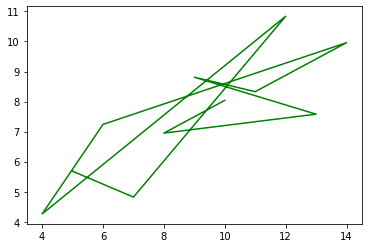

In [83]:
plt.plot(dataset1.x, dataset1.y , 'g') # color => 'r', 'y'....

점으로 그래프를 그리면

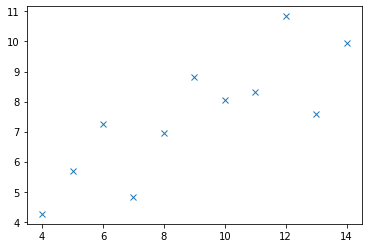

In [82]:
plt.plot(dataset1.x, dataset1.y , 'x') # or 'o'

In [ ]:
matplotlib 라이브러리로 그래프 그리기
1. 전체그래프가 위치할 기본틀을 그린다
2. 그래프를 그려 넣을 그래프 격자를 만듭니다.
3. 그런 다음 격자에 그래프를 하나씩 추가합니다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향입니다.
4. 만약 격자의 첫 번째 행이 꽉 차면 두번째행에 그래프를 그려 넣습니다.

In [ ]:
한번에 4개 그래프 그리기

In [148]:
dataset2 = anscombe[anscombe['dataset'] == 'II']
dataset3 = anscombe[anscombe['dataset'] == 'III']
dataset4 = anscombe[anscombe['dataset'] == 'IV']

In [149]:
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [150]:
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

In [151]:
axes1.plot(dataset1.x, dataset1.y, 'o')
axes2.plot(dataset2.x, dataset2.y, 'o')
axes3.plot(dataset3.x, dataset3.y, 'o')
axes4.plot(dataset4.x, dataset4.y, 'o')

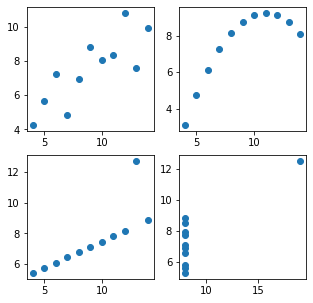

In [152]:
fig

In [153]:
axes1.set_title('dataset1')
axes2.set_title('dataset2')
axes3.set_title('dataset3')
axes4.set_title('dataset4')

Text(0.5, 1.0, 'dataset4')

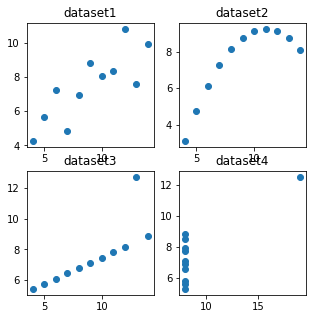

In [154]:
fig

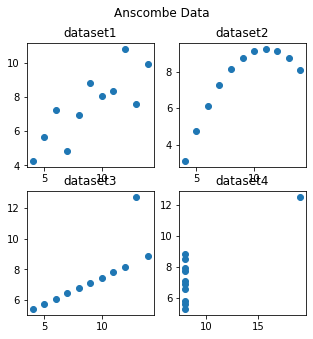

In [155]:
fig.suptitle('Anscombe Data')
fig

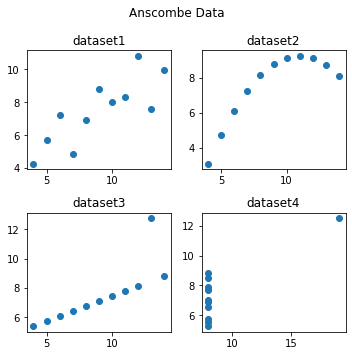

In [156]:
fig.tight_layout()
fig

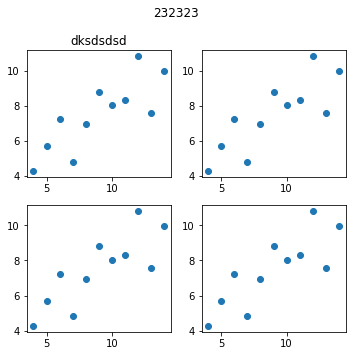

In [157]:
plt.figure(figsize= (5,5))
plt.suptitle(232323)
plt.subplot(2,2,1)
plt.title('dksdsdsd')
plt.plot(dataset1.x, dataset1.y, 'o')
plt.subplot(2,2,2)
plt.plot(dataset1.x, dataset1.y, 'o')
plt.subplot(2,2,3)
plt.plot(dataset1.x, dataset1.y, 'o')
plt.subplot(2,2,4)
plt.plot(dataset1.x, dataset1.y, 'o')
plt.tight_layout()

## matplotlib 라이브러리 자유자재로 사용하기

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
type(tips)

pandas.core.frame.DataFrame

In [ ]:
변수 하나만을 사용해서 그린 그래프를  '일변량 그래프' 라고 한다.

In [ ]:
기본 틀을 마련하고 그래프 격자를 구성

In [159]:
fig1 = plt.figure()
axes_1 = fig.add_subplot(1,1,1)

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Total Bill')

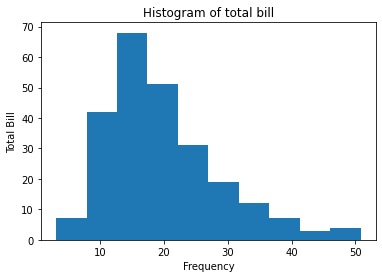

In [161]:
fig1 = plt.figure()
axes_1 = fig1.add_subplot(1,1,1)
axes_1.hist(tips['total_bill'], bins = 10) # bins 는 x 축의 간격을 조정해주는 인자값을 받음.
axes_1.set_title('Histogram of total bill')
axes_1.set_xlabel('Frequency')
axes_1.set_ylabel('Total Bill')

In [ ]:
변수 두개를 사용하여 만드는 그래프를 '이변량 그래프' 라고 하며 이는 주로 산점도 그래프, 박스그래프에 쓰인다.

Text(0, 0.5, 'tip')

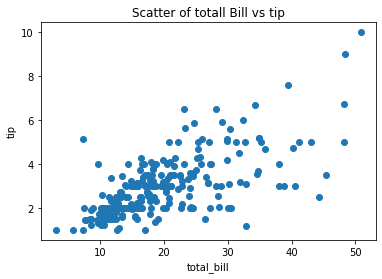

In [147]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatter of totall Bill vs tip')
axes1.set_xlabel('total_bill')
axes1.set_ylabel('tip')

In [ ]:
박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다.
=> 이산형 변수란 명확하게 구분되는 값, 연속형 변수란 명확하게 셀 수 없는 범위의 값

Text(0.5, 1.0, 'Boxplot of tips vs sex')

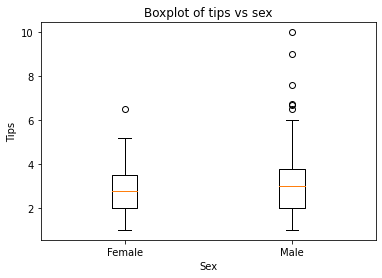

In [163]:
box_plot = plt.figure()
axes1 = box_plot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex'] == 'Male']['tip']], labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tips')
axes1.set_title('Boxplot of tips vs sex')

In [ ]:
3개 이상의 변수를 사용한 그래프는 다변량 그래프 라고 부른다
=> 필요한 이유 : 상관 관계가 있는 변수들의 관계를 보기 위해
    
산점도 그래프를 주로 사용, 문자열은 산점도 그래프에서 색상을 지정하는 값으로 사용할 수 없으므로 정수로 치환하는 함수를
만들어야함.

In [6]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [30]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


AttributeError: 'PathCollection' object has no property 'kind'

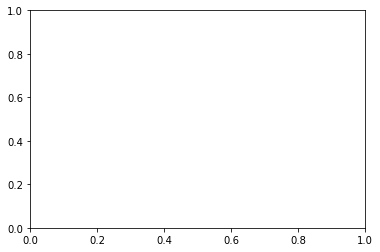

In [31]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips.total_bill, tips.tip, s= tips.size / 10, c = tips.sex_color)
axes1.set_title('Total bill vs tip colored by sex and sized by size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tips')

## seaborn 라이브러리 자유자재로 사용하기

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [ ]:
seaborn라이브러리로 히스토그램을 그리려면
subplots / distplot 메서드를 사용하면 된다
subplots으로 기본틀을 만들고 distplot 메서드에 열데이터를 주면 히스토그램을 만들 수 있다
distplot => 히스토그램 / 밀집도 그래프 / 양탄자 그래프(데이터의 밀집정도)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

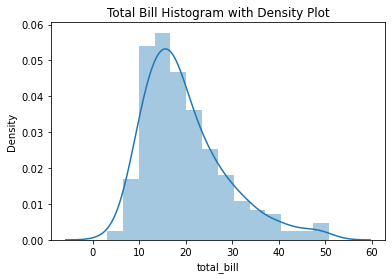

In [20]:
ax = plt.subplots()
ax = sns.distplot(tips.total_bill)
ax.set_title('Total Bill Histogram with Density Plot')

In [ ]:
여기서 밀집도 그래프를 제거하고 싶다면 distplot 메서드 인자에 kde = False 를 넣어주고
히스토그램을 제거하고 싶다면 distplot메서드 인자에 hist = False 를 넣어주면 된다.
양탄자 그래프를 넣어주고 싶다면 인자에 rug = True를 기입하면 된다.(default는 False)

In [ ]:
Count 그래프
Count 그래프는 이산값을 나타낸 그래프 / sns.countplot(열이름, data = 데이터)

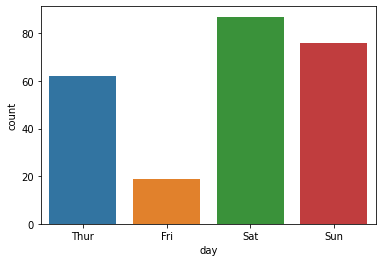

In [23]:
ax = plt.subplots()
ax = sns.countplot('day', data = tips)

In [ ]:
산점도 그래프
regplot => 산점도와 회귀선을 함꼐 그릴 수 있음. / 회귀선을 제거할려면 fit_reg 인자를 False로 지정.

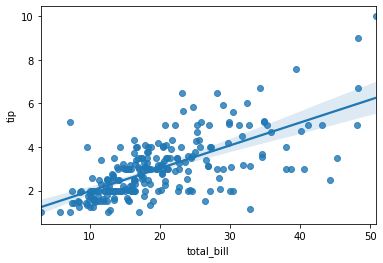

In [25]:
ax = plt.subplots()
ax = sns.regplot(data= tips, x= 'total_bill', y = 'tip')

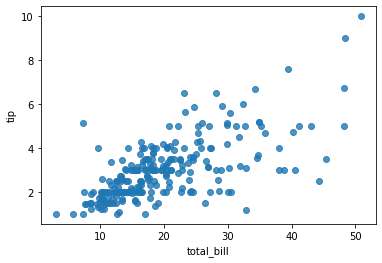

In [26]:
ax = plt.subplots()
ax = sns.regplot(data= tips, x= 'total_bill', y = 'tip', fit_reg= False)

In [ ]:
jointplot 그래프
jointplot => 산점도 그래프와 히스토그램 

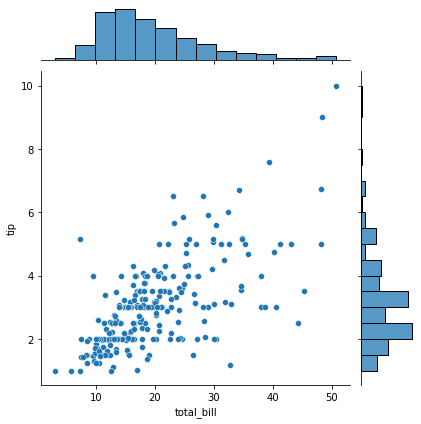

In [27]:
joint = sns.jointplot(data = tips, x= 'total_bill', y = 'tip')

In [ ]:
만약 육각으로 표현하고 싶으면, 인자에 kind = 'hex' 넣어주면 됨.

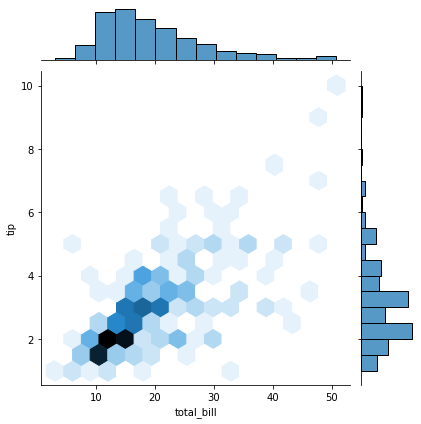

In [28]:
joint = sns.jointplot(data = tips, x= 'total_bill', y = 'tip', kind = 'hex')

In [ ]:
이차원 밀집도 그리기
kdeplot 메서드 (kde 는 밀집도를 의미)

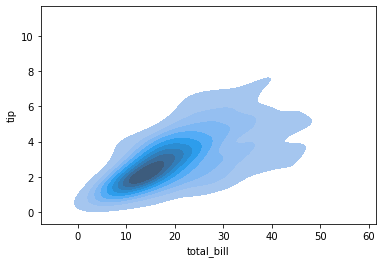

In [33]:
ax = plt.subplots()
ax = sns.kdeplot(x = tips.total_bill, y = tips.tip, shade = True)

In [ ]:
바 그래프
바 그래프는 지정한 변수의 평균 포함.

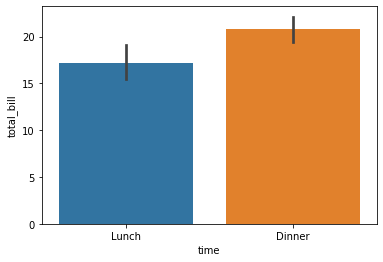

In [34]:
ax = plt.subplots()
ax = sns.barplot(data = tips, x= 'time', y = 'total_bill')

In [ ]:
박스 그래프
박스 그래프는 최솟값, 1분위수, 중간값 , 3분위수 , 최댓값, 이상치 등 다양한 통계량을 한 번에 포현하는 그래프
박스그래프는 다양한 통계 수치를 잘 보여주지만, 분산이 모호하게 표현

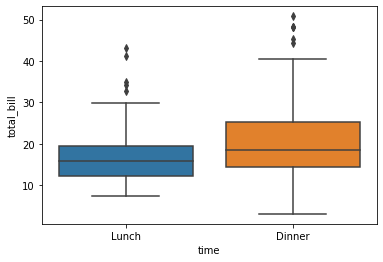

In [36]:
ax = plt.subplots()
ax = sns.boxplot(data = tips, x = 'time', y = 'total_bill')

In [ ]:
데이터 분산이 모호하게 표현된 box그래프 대신 violinplot을 사용하면 커널밀도를 보여줌 

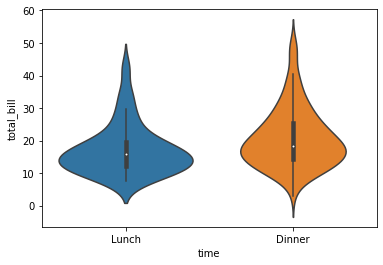

In [37]:
ax = plt.subplots()
ax = sns.violinplot(data = tips, x = 'time', y = 'total_bill')

In [ ]:
관계 그래프
종합된 그래프

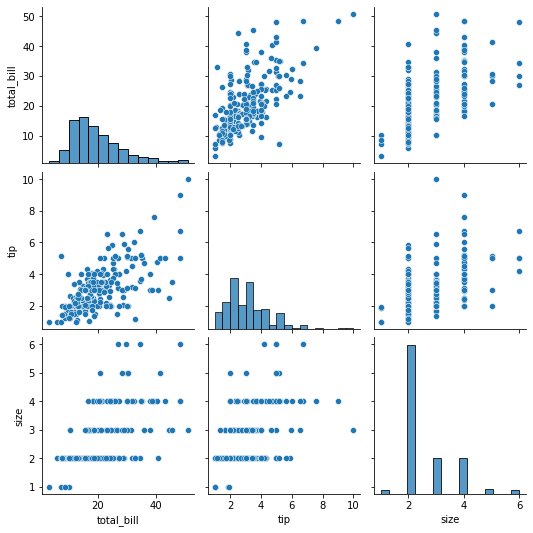

In [38]:
fig = sns.pairplot(tips)
그래프의 절반은 나머지 절반과 동일 / 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체 가능 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

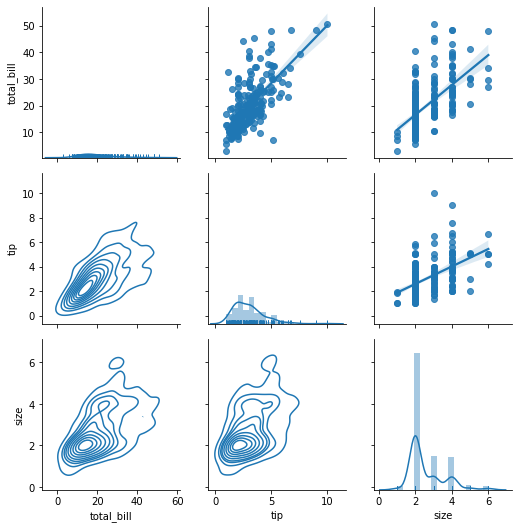

In [39]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)

3부분으로 구분 / 대각선 위, 아래, 중심

In [ ]:
다변량 그래프 그리기
바이올린 그래프 그리기 색상추가
sns.violinplot(x = 열이름, y = 열이름, hue = 색상으로 표현될 열이름, data = 데이터 , split = True)

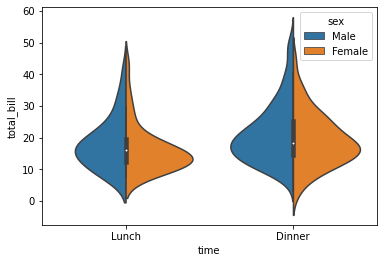

In [6]:
ax = plt.subplots()
ax = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

In [ ]:
산점도, 관계그래프 그리기  - 색상 추가
sns.lmplot(x= '열이름', y = '열이름', data = 데이터 , hue = '색상으로 표현될 열 이름', fit_reg= False)

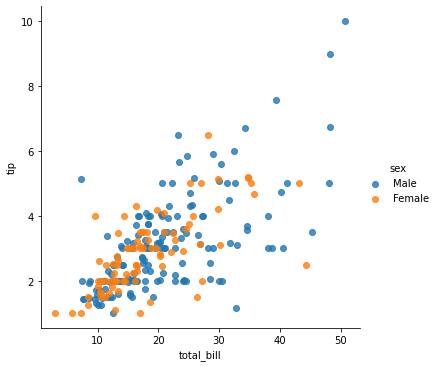

In [7]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', fit_reg = False)

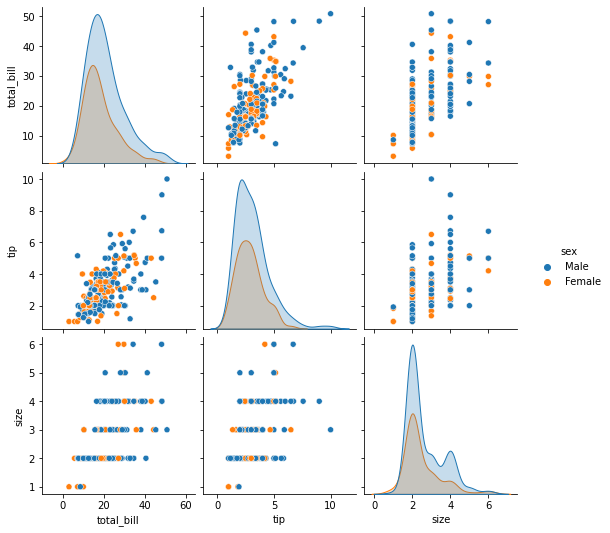

In [8]:
fig = sns.pairplot(tips ,  hue = 'sex')

In [ ]:
산점도 그래프의 크기와 모양 조절하기
점의 크기를 조절할려면 scatter_kws에 딕션너리 형태로 인잣값을 전달하면 됨
점을 다르게 표현하고 싶다면 markers 인잣값에 표현하고자 하는 기호를 리스트에 담아 전달

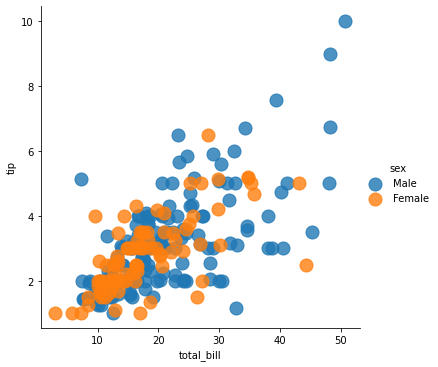

In [9]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', fit_reg = False, 
                     scatter_kws = {'s': tips.size*1/10})

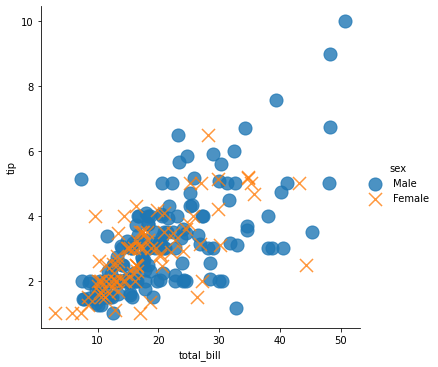

In [12]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', fit_reg = False, 
                      markers = ['o', 'x'] ,scatter_kws = {'s': tips.size*1/10})

In [ ]:
그룹구분하여 그래프 만들기 1
lmplot 메서드로 4개의 그래프 그리기 (앤스콤 데이터 활용)
sns.lmplot(x= 'x', y = 'y', data = anscombe, fit_reg = False, col = 'dataset', col_wrap = 2 => 시각화 시 그래프 배치 조절)

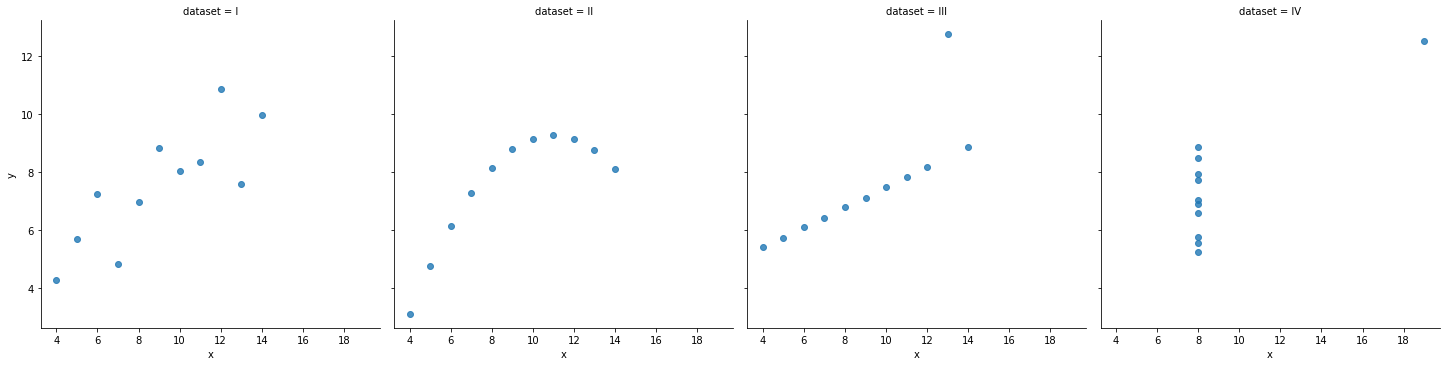

In [18]:
sns.lmplot(x= 'x', y = 'y', data = anscombe, fit_reg = False, col = 'dataset', col_wrap = 4)

In [ ]:
그룹구분하여 그래프 만들기 2
FacetGrid 클래스
exam = sns.FacetGrid(tips, col = 'times')
exam.map(sns.plot, 'total_bill', rug = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

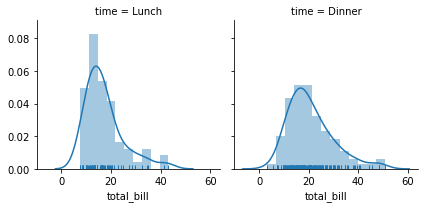

In [21]:
exam = sns.FacetGrid(tips, col = 'time')
exam.map(sns.distplot, 'total_bill', rug = True)

In [ ]:
다변량 그래프 경우
facet = sns.FacetGrid(tips , col = 'day', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

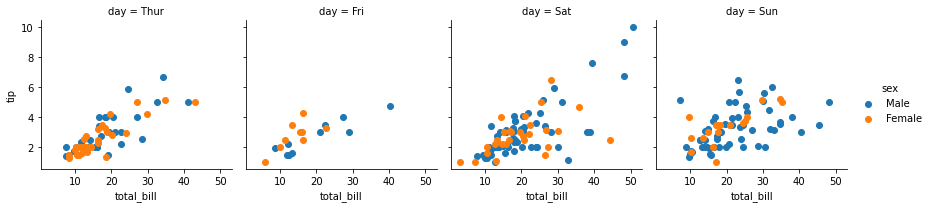

In [23]:
facet = sns.FacetGrid(tips , col = 'day', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

In [ ]:
더 많은 변수

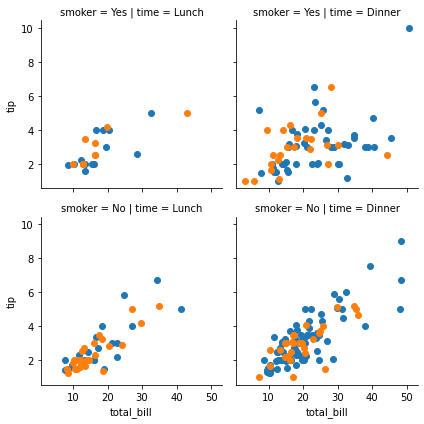

In [25]:
facet = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')

In [ ]:
데이터프레임과 시리즈로 그래프 구하기
시리즈에 있는 plot 속성에 정의된 hist 메서드를 사용하면 해당 시리즈의 값을 이용하여 히스토그램을 바로 그릴 수 있음.

<AxesSubplot:ylabel='Frequency'>

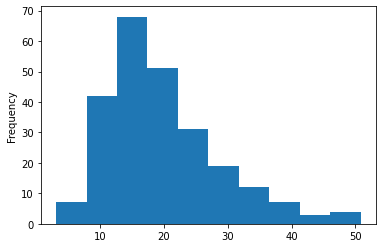

In [27]:
tips.total_bill.plot.hist()

KeyError: ('total_bill', 'tip')

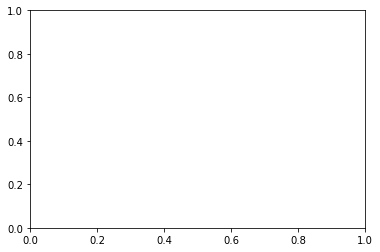

In [33]:
fig , ax = plt.subplots()
ax = tips['total_bill', 'tip'].plot.hist(alpha = 0.5, bins = 20 , ax =ax)

In [ ]:
밀집도, 산점도 그래프 , 육각그래프, 박스그래프는 
kde      scatter         hexbin      box

<AxesSubplot:ylabel='Density'>

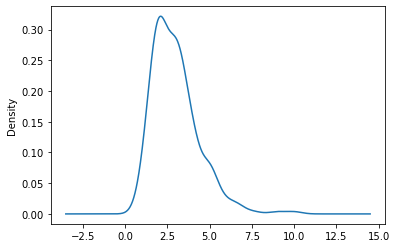

In [34]:
tips.tip.plot.kde()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

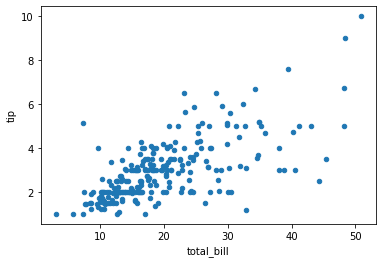

In [36]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

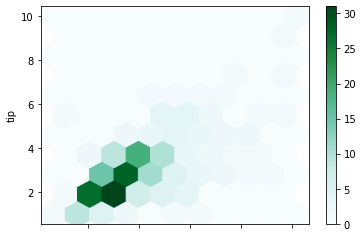

In [38]:
tips.plot.hexbin(x = 'total_bill', y = 'tip', gridsize= 10)

<AxesSubplot:>

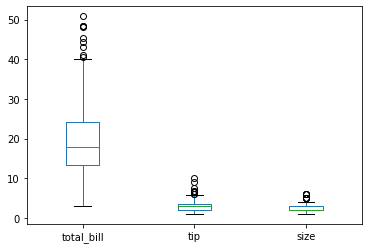

In [39]:
tips.plot.box()

In [ ]:
seaborn 라이브러리로 그래프 스타일 지정하기
seaborn_style = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set_style(one of the seaborn_style)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

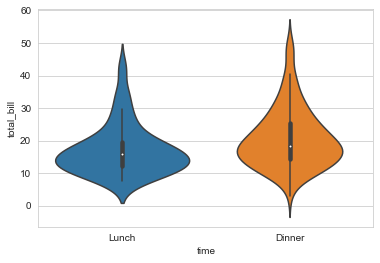

In [47]:
sns.set_style('whitegrid')
sns.violinplot(x= 'time', y= 'total_bill', data = tips)

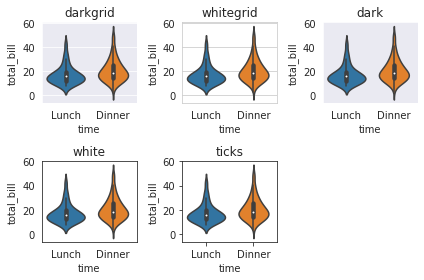

In [45]:
fig = plt.figure()
seaborn_style = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
for idx, style in enumerate(seaborn_style):
    plot_position  = idx +1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3, plot_position)
        violin = sns.violinplot(x = 'time', y = 'total_bill', data = tips)
        violin.set_title(style)
fig.tight_layout()